# Creating statistics and maps of street designations for Switzerland

## Load data

<font color='red'>WARNING</font> streets_geom (pure_line.geojson) file is 450 MByte and takes a couple of min to load

In [1]:
import pandas as pd
import geopandas

# Street name designations
streetnames = pd.read_csv('../Datapreparation/streetnames.csv', encoding='UTF-8-SIG', sep=';')

# Street name geometries
streets_geom = geopandas.read_file('data/pure_line.geojson')

# Communes data
com = pd.read_csv('data/gmde_info.csv', encoding='UTF-8-SIG', sep=';')

# Communes geometries
com_geom = geopandas.read_file('data/gemeinden.geojson')

## Merging datasets

In [2]:
# Create dataset with all information on street level
streetnames_geom = pd.merge(streets_geom, streetnames, on=['STR_ESID','STR_ESID'])

In [3]:
# Create dataset with all information on commune level
communes = pd.merge(com_geom, com, on=['GMDNR','GMDNR'])

In [96]:
# Create dataset with all information on canton level
cantons = communes.dissolve('KTNR_x')

In [110]:
dfCantons = streetnames_geom.COM_CANTON.unique()
dfCantons = streetnames_geom['COM_CANTON'].value_counts().reset_index()
dfCantons.columns  = ['Cantons','Cases']
dfCantons.head()

,Cantons,Cases
0,ZH,26586
1,SG,19430
2,BE,16850
3,AG,14727
4,VD,13203


In [10]:
streetnames_agg_comm = streetnames_geom.dissolve(by='COM_FOSNR', aggfunc='sum')

C:\CAS_Arbeit\cassda-zertifikatsarbeit\venv\lib\site-packages\geopandas\geodataframe.py:1705: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_data = data.groupby(**groupby_kwargs).agg(aggfunc)


In [29]:
streetnames_agg_comm = streetnames_geom.dissolve(by='COM_FOSNR', aggfunc={
         "LENGTH": "sum",
         "COM_NAME": "first",
    "COM_FOSNR": "first"
    
     })



## Map of street designations

In [72]:
from plotnine import *
import shapely.affinity
from shapely.geometry import Point
import geopy
import geopy.distance
import folium

%matplotlib inline

In [58]:
#bounds for Zurich
xmin =2681119
ymin =1245510
xmax =2684660
ymax =1250470

In [43]:
streets_geo_zurich = streets_geom.cx[xmin:xmax, ymin:ymax]

<AxesSubplot: >

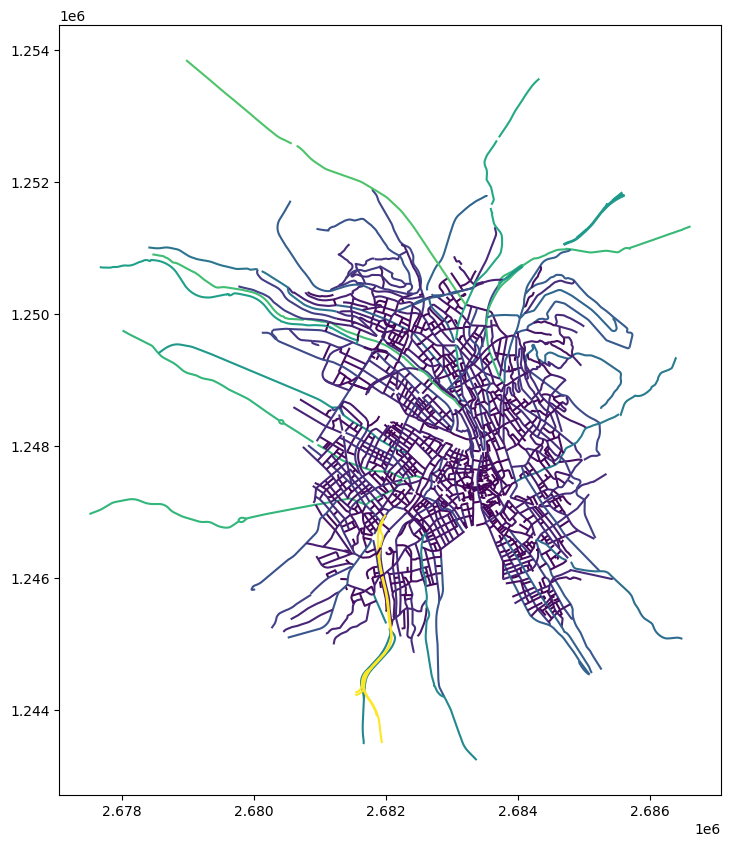

In [73]:
streets_geo_zurich.plot(column='LENGTH', figsize=(10, 10))

In [60]:
streets_geom.head()

,OBJECTID_1,STR_ESID,STN_LANG,Shape_Length,LENGTH,geometry
0,1,10023770,0,151.673319,151.673319,"LINESTRING (2610645.254 1254274.862, 2610668.6..."
1,2,10179192,0,142.875026,142.875026,"LINESTRING (2598655.180 1249596.654, 2598663.3..."
2,3,10140563,0,205.258129,205.258129,"LINESTRING (2622970.678 1257509.991, 2622978.6..."
3,4,10069457,0,141.676812,141.676812,"LINESTRING (2630236.660 1251316.293, 2630250.8..."
4,5,10096235,0,325.942182,325.942182,"MULTILINESTRING ((2621293.775 1256829.888, 262..."


In [62]:
streetnames.head()

,Unnamed: 0,STR_ESID,STN_LABEL,COM_FOSNR,COM_NAME,COM_CANTON,STR_OFFICIAL,STR_EASTING,STR_NORTHING,STN_LABEL_NO_BI,STN_LABEL_NO_TERMS,STR_TERMS,STR_PREPS,STN_LABEL_FINAL
0,1,10023770,Wiedenweg,2786,Grellingen,BL,True,2610733.0,1254311.0,Wiedenweg,Wieden,weg,NaN,Wieden
1,2,10179192,Wuhrbärgli,2788,Liesberg,BL,True,2598709.0,1249640.0,Wuhrbärgli,Wuhrbärgli,NaN,NaN,Wuhrbärgli
2,9,10140563,Emanuelenweg,2829,Liestal,BL,True,2623078.0,1257558.0,Emanuelenweg,Emanuelen,weg,NaN,Emanuelen
3,13,10069457,Löhrweg,2850,Känerkinden,BL,True,2630229.0,1251411.0,Löhrweg,Löhr,weg,NaN,Löhr
4,15,10096235,Brunngasse,2833,Seltisberg,BL,True,2621406.0,1256852.0,Brunngasse,Brunn,gasse,NaN,Brunn


In [63]:
streetnames_geom = pd.merge(streets_geom, streetnames, on=['STR_ESID','STR_ESID'])

In [65]:
streetnames_geom.head()

,OBJECTID_1,STR_ESID,STN_LANG,Shape_Length,LENGTH,geometry,Unnamed: 0,STN_LABEL,COM_FOSNR,COM_NAME,COM_CANTON,STR_OFFICIAL,STR_EASTING,STR_NORTHING,STN_LABEL_NO_BI,STN_LABEL_NO_TERMS,STR_TERMS,STR_PREPS,STN_LABEL_FINAL
0,1,10023770,0,151.673319,151.673319,"LINESTRING (2610645.254 1254274.862, 2610668.6...",1,Wiedenweg,2786,Grellingen,BL,True,2610733.0,1254311.0,Wiedenweg,Wieden,weg,NaN,Wieden
1,2,10179192,0,142.875026,142.875026,"LINESTRING (2598655.180 1249596.654, 2598663.3...",2,Wuhrbärgli,2788,Liesberg,BL,True,2598709.0,1249640.0,Wuhrbärgli,Wuhrbärgli,NaN,NaN,Wuhrbärgli
2,3,10140563,0,205.258129,205.258129,"LINESTRING (2622970.678 1257509.991, 2622978.6...",9,Emanuelenweg,2829,Liestal,BL,True,2623078.0,1257558.0,Emanuelenweg,Emanuelen,weg,NaN,Emanuelen
3,4,10069457,0,141.676812,141.676812,"LINESTRING (2630236.660 1251316.293, 2630250.8...",13,Löhrweg,2850,Känerkinden,BL,True,2630229.0,1251411.0,Löhrweg,Löhr,weg,NaN,Löhr
4,5,10096235,0,325.942182,325.942182,"MULTILINESTRING ((2621293.775 1256829.888, 262...",15,Brunngasse,2833,Seltisberg,BL,True,2621406.0,1256852.0,Brunngasse,Brunn,gasse,NaN,Brunn


In [68]:
streets_geo_zurich = streetnames_geom.cx[xmin:xmax, ymin:ymax]

<AxesSubplot: >

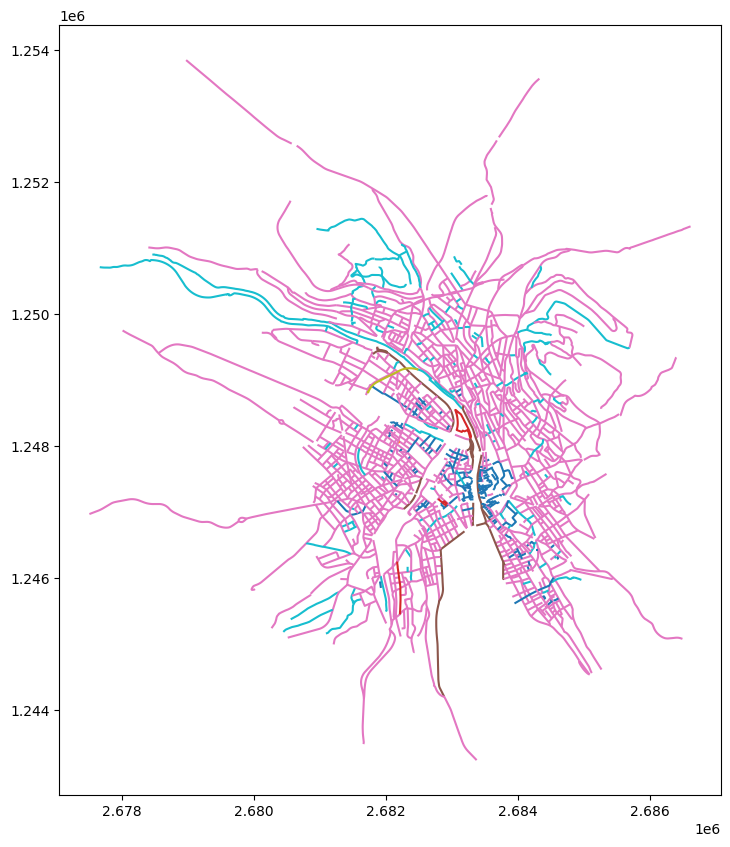

In [70]:
streets_geo_zurich.plot(column='STR_TERMS', figsize=(10, 10))

## Mapping communes

<AxesSubplot: >

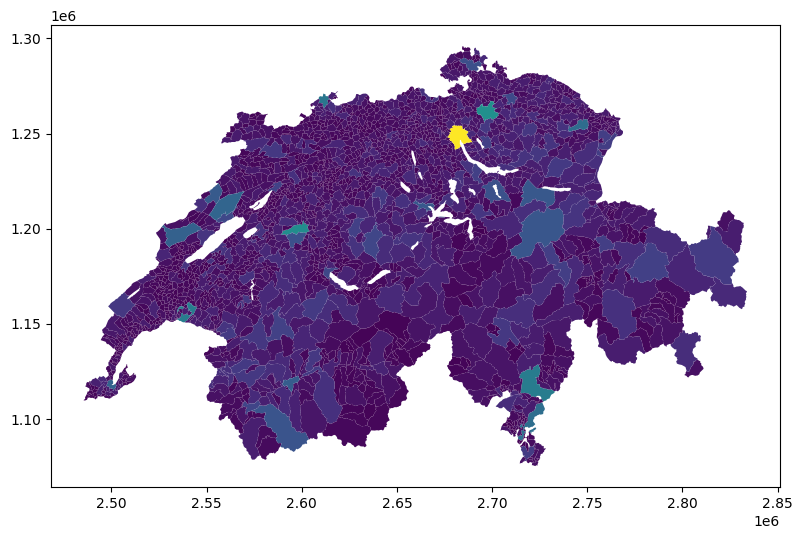

In [40]:
communes.plot(column='GMD_STR_LENGTH', figsize=(10, 6))

In [36]:
communes2 = pd.merge(communes, streetnames_agg_comm, on=['GMDNR'])


In [32]:
streetnames_agg_comm = streetnames_agg_comm.rename(columns={"COM_FOSNR":"GMDNR"})

In [45]:
streetnames_agg_comm.columns

Index(['geometry', 'LENGTH', 'COM_NAME', 'GMDNR'], dtype='object')

In [44]:
communes.columns

Index(['FID', 'GMDHISTID_x', 'GMDNR', 'GMDNAME_x', 'BZHISTID_x', 'BZNR_x',
       'KTNR_x', 'GRNR_x', 'AREA_HA_x', 'E_MIN', 'E_MAX', 'N_MIN', 'N_MAX',
       'E_CNTR_x', 'N_CNTR_x', 'Z_MIN', 'Z_MAX', 'Z_AVG', 'Z_MED', 'Z_CNTR_x',
       'geometry', 'GMDHISTID_y', 'GMDNAME_y', 'BZHISTID_y', 'BZNR_y',
       'KTNR_y', 'GRNR_y', 'AREA_HA_y', 'E_CNTR_y', 'N_CNTR_y', 'Z_CNTR_y',
       'GMD_STR_LENGTH'],
      dtype='object')

In [47]:
communes2.columns

Index(['FID', 'GMDHISTID_x', 'GMDNR', 'GMDNAME_x', 'BZHISTID_x', 'BZNR_x',
       'KTNR_x', 'GRNR_x', 'AREA_HA_x', 'E_MIN', 'E_MAX', 'N_MIN', 'N_MAX',
       'E_CNTR_x', 'N_CNTR_x', 'Z_MIN', 'Z_MAX', 'Z_AVG', 'Z_MED', 'Z_CNTR_x',
       'geometry_x', 'GMDHISTID_y', 'GMDNAME_y', 'BZHISTID_y', 'BZNR_y',
       'KTNR_y', 'GRNR_y', 'AREA_HA_y', 'E_CNTR_y', 'N_CNTR_y', 'Z_CNTR_y',
       'GMD_STR_LENGTH', 'geometry_y', 'LENGTH', 'COM_NAME'],
      dtype='object')

In [48]:
communes2 = communes2.rename(columns={"geometry_x":"geometry"})

<AxesSubplot: >

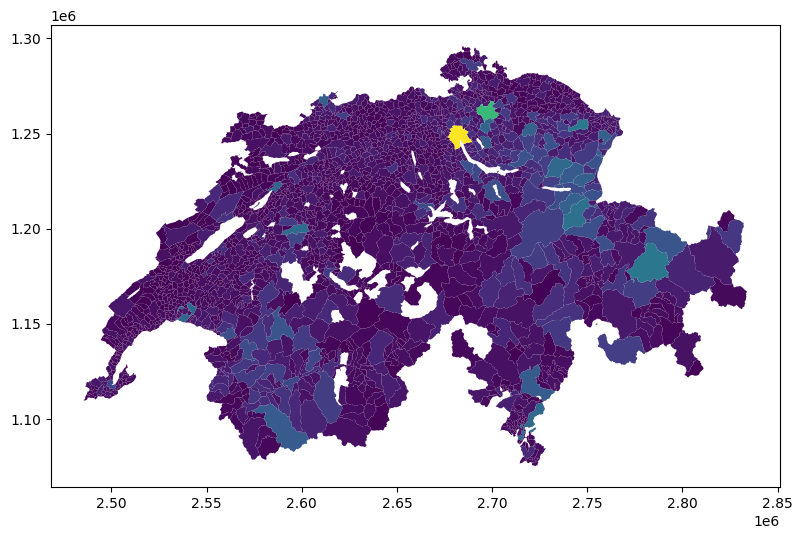

In [49]:
communes2.plot(column='LENGTH', figsize=(10, 6))

<AxesSubplot: >

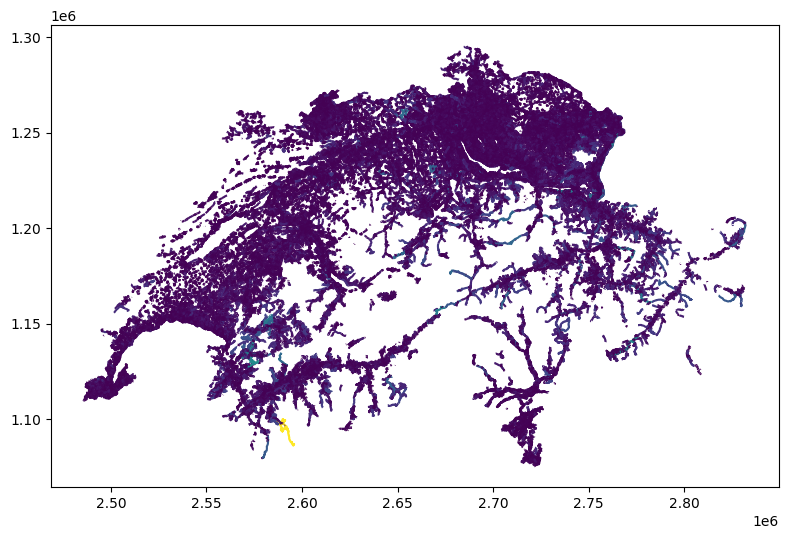

In [51]:
streets_geom.plot(column='LENGTH', figsize=(10, 6))